In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
pd.set_option("display.max_columns", None)

In [3]:
df = pd.read_csv('/run/media/Nihar/D_DRV_i5/projects/house price prediction/data/House Price India.csv')
df.head()

,id,Date,number of bedrooms,number of bathrooms,living area,lot area,number of floors,waterfront present,number of views,condition of the house,grade of the house,Area of the house(excluding basement),Area of the basement,Built Year,Renovation Year,Postal Code,Lattitude,Longitude,living_area_renov,lot_area_renov,Number of schools nearby,Distance from the airport,Price
0,6762810145,42491,5,2.50,3650,9050,2.0,0,4,5,10,3370,280,1921,0,122003,52.8645,-114.557,2880,5400,2,58,2380000
1,6762810635,42491,4,2.50,2920,4000,1.5,0,0,5,8,1910,1010,1909,0,122004,52.8878,-114.470,2470,4000,2,51,1400000
2,6762810998,42491,5,2.75,2910,9480,1.5,0,0,3,8,2910,0,1939,0,122004,52.8852,-114.468,2940,6600,1,53,1200000
3,6762812605,42491,4,2.50,3310,42998,2.0,0,0,3,9,3310,0,2001,0,122005,52.9532,-114.321,3350,42847,3,76,838000
4,6762812919,42491,3,2.00,2710,4500,1.5,0,0,4,8,1880,830,1929,0,122006,52.9047,-114.485,2060,4500,1,51,805000


In [4]:
feature_names = list(df.columns)
print(feature_names)


['id', 'Date', 'number of bedrooms', 'number of bathrooms', 'living area', 'lot area', 'number of floors', 'waterfront present', 'number of views', 'condition of the house', 'grade of the house', 'Area of the house(excluding basement)', 'Area of the basement', 'Built Year', 'Renovation Year', 'Postal Code', 'Lattitude', 'Longitude', 'living_area_renov', 'lot_area_renov', 'Number of schools nearby', 'Distance from the airport', 'Price']


In [5]:
df.describe()

,id,Date,number of bedrooms,number of bathrooms,living area,lot area,number of floors,waterfront present,number of views,condition of the house,grade of the house,Area of the house(excluding basement),Area of the basement,Built Year,Renovation Year,Postal Code,Lattitude,Longitude,living_area_renov,lot_area_renov,Number of schools nearby,Distance from the airport,Price
count,1.462000e+04,14620.000000,14620.000000,14620.000000,14620.000000,1.462000e+04,14620.000000,14620.000000,14620.000000,14620.000000,14620.000000,14620.000000,14620.000000,14620.000000,14620.000000,14620.000000,14620.000000,14620.000000,14620.000000,14620.000000,14620.000000,14620.000000,1.462000e+04
mean,6.762821e+09,42604.538646,3.379343,2.129583,2098.262996,1.509328e+04,1.502360,0.007661,0.233105,3.430506,7.682421,1801.783926,296.479070,1970.926402,90.924008,122033.062244,52.792848,-114.404007,1996.702257,12753.500068,2.012244,64.950958,5.389322e+05
std,6.237575e+03,67.347991,0.938719,0.769934,928.275721,3.791962e+04,0.540239,0.087193,0.766259,0.664151,1.175033,833.809963,448.551409,29.493625,416.216661,19.082418,0.137522,0.141326,691.093366,26058.414467,0.817284,8.936008,3.675324e+05
min,6.762810e+09,42491.000000,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,4.000000,370.000000,0.000000,1900.000000,0.000000,122003.000000,52.385900,-114.709000,460.000000,651.000000,1.000000,50.000000,7.800000e+04
25%,6.762815e+09,42546.000000,3.000000,1.750000,1440.000000,5.010750e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1200.000000,0.000000,1951.000000,0.000000,122017.000000,52.707600,-114.519000,1490.000000,5097.750000,1.000000,57.000000,3.200000e+05
50%,6.762821e+09,42600.000000,3.000000,2.250000,1930.000000,7.620000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1580.000000,0.000000,1975.000000,0.000000,122032.000000,52.806400,-114.421000,1850.000000,7620.000000,2.000000,65.000000,4.500000e+05
75%,6.762826e+09,42662.000000,4.000000,2.500000,2570.000000,1.080000e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2240.000000,580.000000,1997.000000,0.000000,122048.000000,52.908900,-114.315000,2380.000000,10125.000000,3.000000,73.000000,6.450000e+05
max,6.762832e+09,42734.000000,33.000000,8.000000,13540.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,122072.000000,53.007600,-113.505000,6110.000000,560617.000000,3.000000,80.000000,7.700000e+06


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14620 entries, 0 to 14619
Data columns (total 23 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     14620 non-null  int64  
 1   Date                                   14620 non-null  int64  
 2   number of bedrooms                     14620 non-null  int64  
 3   number of bathrooms                    14620 non-null  float64
 4   living area                            14620 non-null  int64  
 5   lot area                               14620 non-null  int64  
 6   number of floors                       14620 non-null  float64
 7   waterfront present                     14620 non-null  int64  
 8   number of views                        14620 non-null  int64  
 9   condition of the house                 14620 non-null  int64  
 10  grade of the house                     14620 non-null  int64  
 11  Ar

checking if the data types of features are correct or not



In [7]:
df['waterfront present'].unique()

array([0, 1])

here waterfront present shdnt be kept as int64 cuz it only has 0 and 1 so we can turn it into categorical feature

In [8]:
df['waterfront present'] = df['waterfront present'].astype('category')
df['waterfront present'].dtype

CategoricalDtype(categories=[0, 1], ordered=False, categories_dtype=int64)

applying .uniuqe to every feature to figure out which can be categorical

In [9]:
df.apply(pd.Series.unique)

id                                       [6762810145, 6762810635, 6762810998, 676281260...
Date                                     [42491, 42492, 42493, 42494, 42495, 42496, 424...
number of bedrooms                                 [5, 4, 3, 2, 7, 6, 9, 1, 8, 33, 10, 11]
number of bathrooms                      [2.5, 2.75, 2.0, 3.25, 1.75, 2.25, 1.0, 1.5, 3...
living area                              [3650, 2920, 2910, 3310, 2710, 2600, 3660, 224...
lot area                                 [9050, 4000, 9480, 42998, 4500, 4750, 11995, 1...
number of floors                                            [2.0, 1.5, 1.0, 2.5, 3.0, 3.5]
waterfront present                                    [0, 1]
Categories (2, int64): [0, 1]
number of views                                                            [4, 0, 2, 1, 3]
condition of the house                                                     [5, 3, 4, 2, 1]
grade of the house                                      [10, 8, 9, 7, 6, 12, 11, 5, 4, 13]

Features in Question
number of views
condition of the house
grade of the house

Option 1: Numeric
Treat the values as numbers in regression (e.g., 1,2,3…).

Pros:
Captures linear relationships: higher number → higher price.
Simple, works well for linear regression.

Cons:
Assumes equal spacing between values (difference from 1→2 is same as 3→4).

Option 2: Ordinal Categorical
Treat the values as categories with order (like Poor/Avg/Good → 1,2,3).

Pros:
Can use one-hot encoding or ordinal encoding → flexible for tree-based models.
Doesn’t assume equal spacing.

Cons:
For linear regression, converting to dummies can lose the natural order information.
Adds extra columns if one-hot encoded
To decide that we first have to think what model shd we use for this particular project

To decide that we first have to think what model shd we use for this particular project

1. Linear Regression
Basic, simplest model.
Assumes a linear relationship between features and target.
Works best when features are mostly numeric and linearly correlated with price.
Quick to train, easy to interpret coefficients.

2. Ridge Regression
Like Linear Regression, but adds regularization to prevent overfitting.
Penalizes large coefficients, helps when some features are correlated.
Good when dataset has many numeric features.

3. Lasso Regression
Also adds regularization, but can shrink some coefficients to zero.
Acts like feature selection, ignores less important features automatically.
Useful when you have many irrelevant or redundant features.

4. Elastic Net
Combines Ridge + Lasso penalties.
Balances feature selection and coefficient shrinkage.
Helpful when features are highly correlated and you want some selection.

5. Decision Tree Regressor
Non-linear model, can capture complex patterns.
Splits features into regions based on thresholds.
Can overfit easily on small datasets, but very interpretable.

6. Random Forest Regressor
Ensemble of decision trees → reduces overfitting.
Captures non-linear relationships well.
Works with numeric and categorical features.
Usually gives better accuracy than a single tree.

7. Gradient Boosting Regressor
Builds trees sequentially, each correcting errors of the previous.
Powerful, often better than Random Forest on tabular data.
Can overfit if not tuned properly.

8. XGBoost Regressor
Optimized version of Gradient Boosting, faster and more robust.
Handles missing data well.
Often used in competitions for best performance on tabular datasets.

9. K-Nearest Neighbors Regressor (KNN)
Non-parametric, predicts value based on average of closest points.
Simple, but can be slow on large datasets.
Sensitive to feature scaling and irrelevant features.

💡 Mentoring tip:
Think about your dataset: numeric-heavy, some categorical/ordinal features, moderate size. Decide whether you want:
Simple & interpretable → Linear / Ridge / Lasso
Non-linear, better accuracy → Tree-based (Decision Tree / Random Forest / Gradient Boosting / XGBoost)
Lazy / memory-based → KNN (rarely used for medium-large datasets)

In [10]:
import seaborn as sns

<Figure size 1200x700 with 0 Axes>

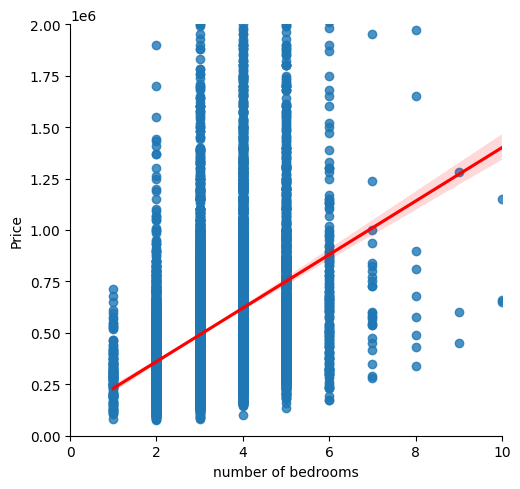

In [11]:
# Step 1: set figure size
plt.figure(figsize=(12,7))

# Step 2: optionally filter data to remove extreme outliers
df_filtered = df[df['number of bedrooms'] <= 10]  # adjust upper limit as needed

# Step 3: create scatter plot with linear fit
sns.lmplot(
    x='number of bedrooms', 
    y='Price', 
    data=df_filtered, 
    line_kws={'color':'red'}
)

# Step 4: optionally set axis limits to zoom in
plt.xlim(0, 10)
plt.ylim(0, 2000000)  # adjust based on your price distribution
plt.show()


so we can see the relationship isnt linear its non linear!! so we shdnt use linear regression here  we will be using tree model here

we can use random forest or gradient boosting here xgboost

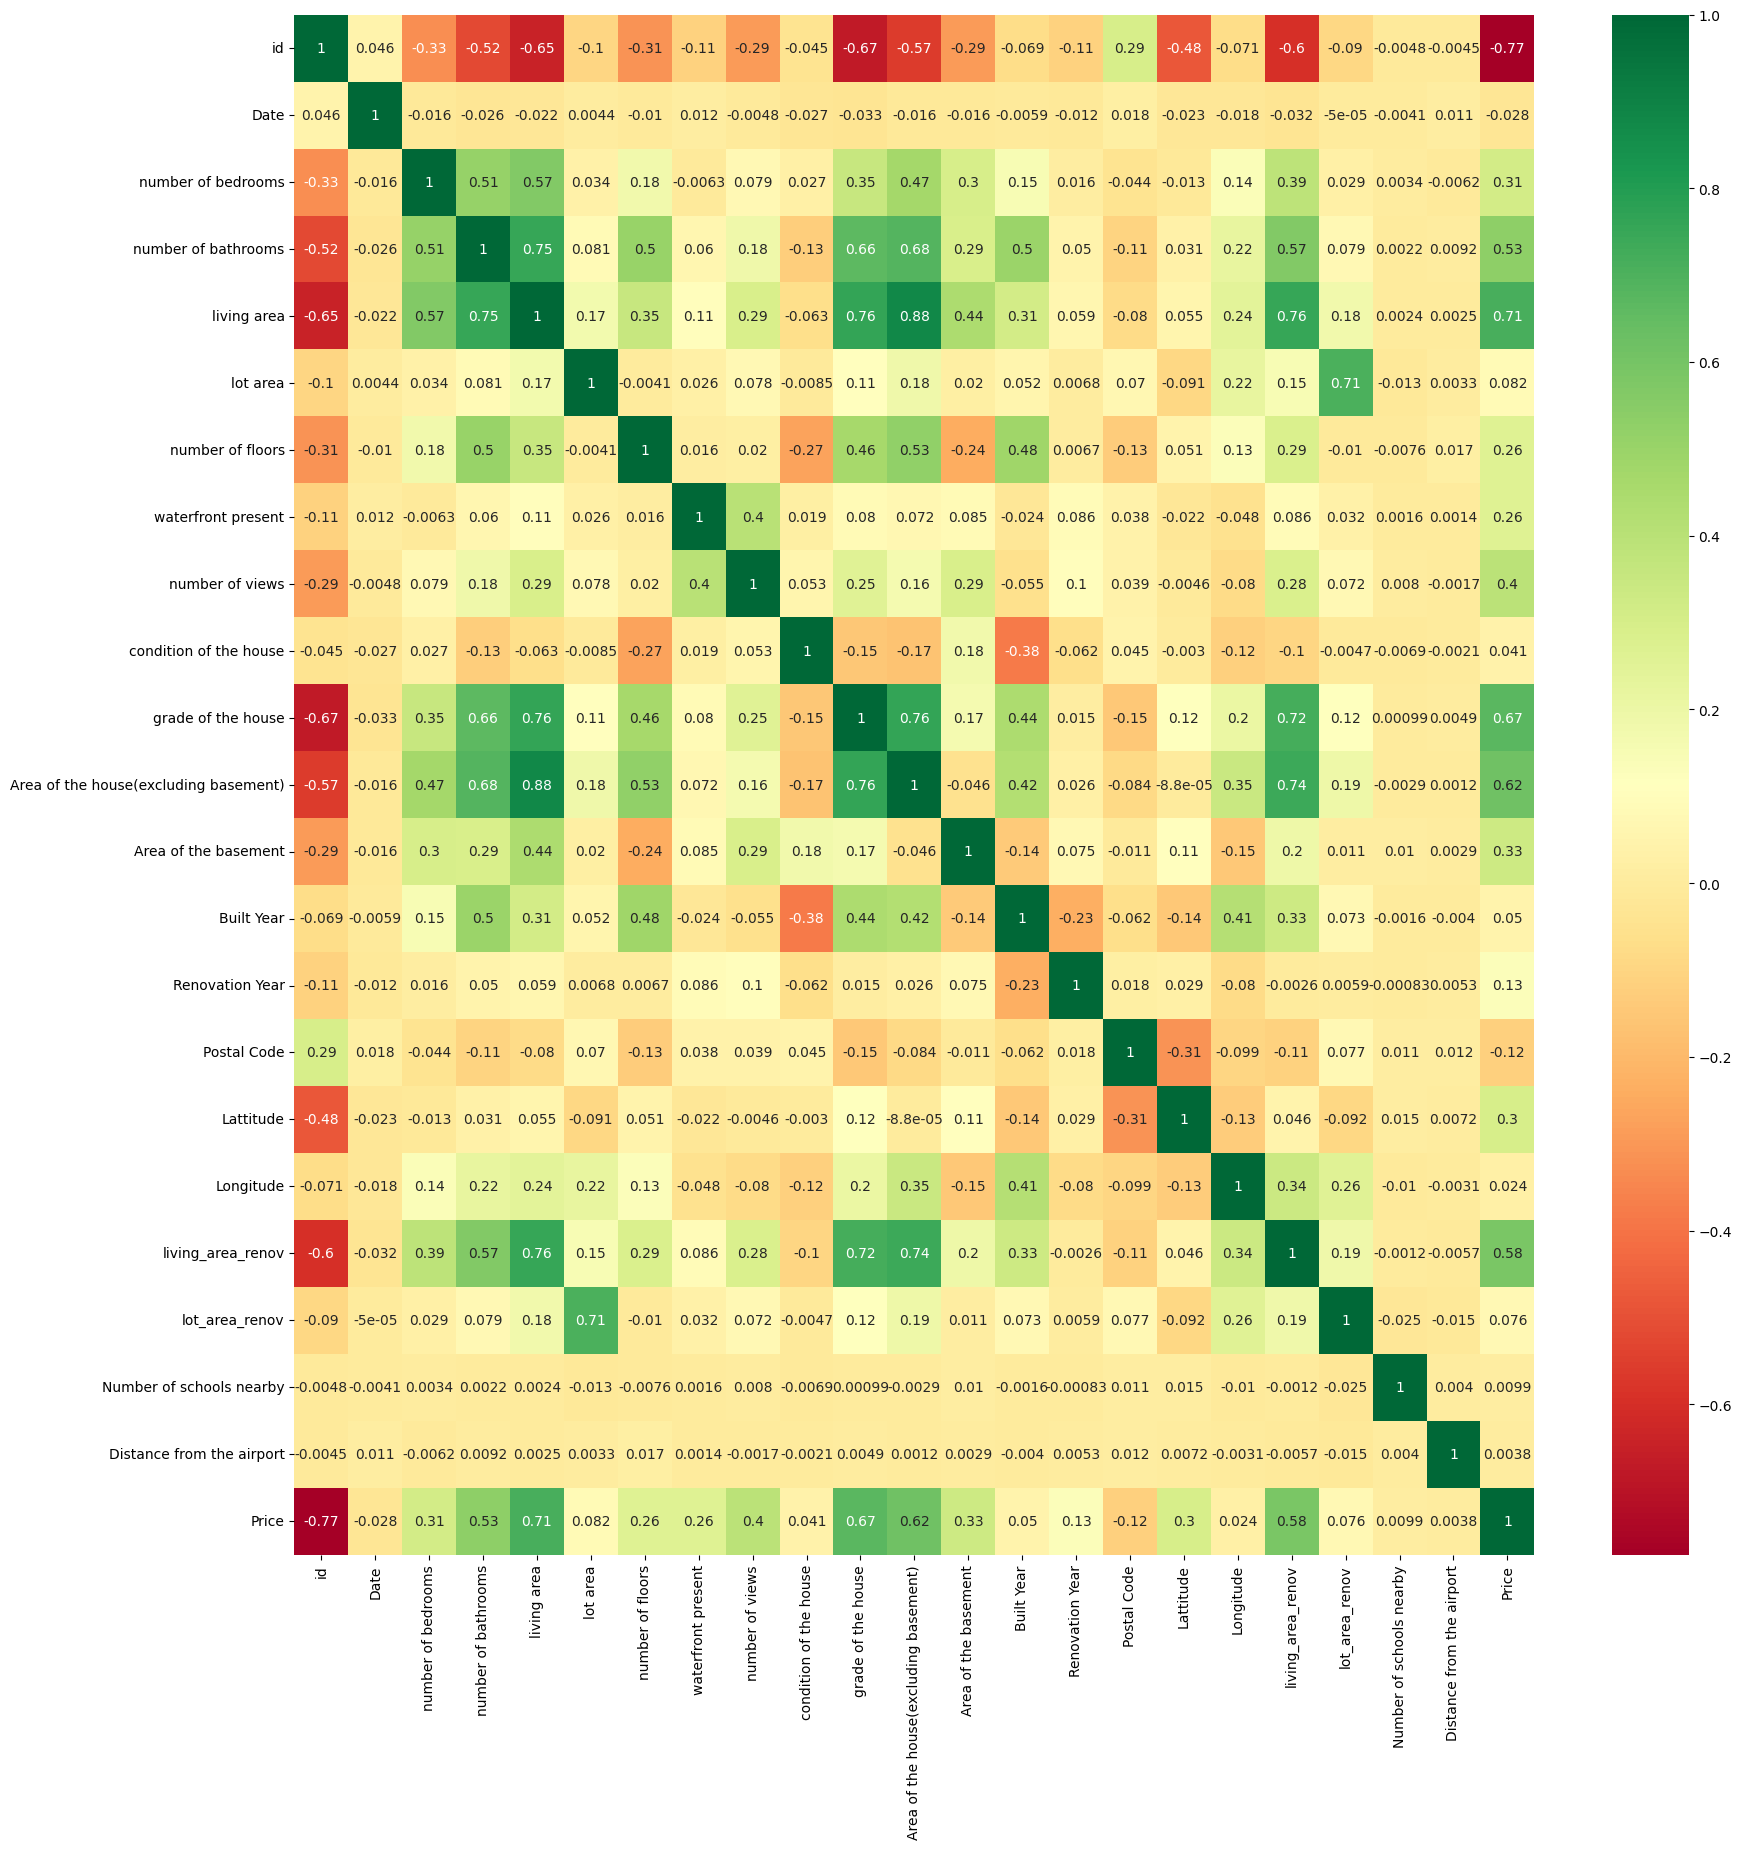

In [12]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),annot=True,cmap = "RdYlGn")
plt.show()

we can see that price is highly correlated to living area, grade of house area of house(excluding basement), living area renov and also kinda on number of bathrooms 

In [13]:
df.head()

,id,Date,number of bedrooms,number of bathrooms,living area,lot area,number of floors,waterfront present,number of views,condition of the house,grade of the house,Area of the house(excluding basement),Area of the basement,Built Year,Renovation Year,Postal Code,Lattitude,Longitude,living_area_renov,lot_area_renov,Number of schools nearby,Distance from the airport,Price
0,6762810145,42491,5,2.50,3650,9050,2.0,0,4,5,10,3370,280,1921,0,122003,52.8645,-114.557,2880,5400,2,58,2380000
1,6762810635,42491,4,2.50,2920,4000,1.5,0,0,5,8,1910,1010,1909,0,122004,52.8878,-114.470,2470,4000,2,51,1400000
2,6762810998,42491,5,2.75,2910,9480,1.5,0,0,3,8,2910,0,1939,0,122004,52.8852,-114.468,2940,6600,1,53,1200000
3,6762812605,42491,4,2.50,3310,42998,2.0,0,0,3,9,3310,0,2001,0,122005,52.9532,-114.321,3350,42847,3,76,838000
4,6762812919,42491,3,2.00,2710,4500,1.5,0,0,4,8,1880,830,1929,0,122006,52.9047,-114.485,2060,4500,1,51,805000


In [14]:
df_copy = df.copy()


In [15]:
df_copy['Norm_Date'] = pd.to_datetime(df['Date'],unit='D',origin='1899-12-30')


In [16]:
df_copy['Sale_Year'] = df_copy['Norm_Date'].dt.year

In [17]:
df_copy.head()

,id,Date,number of bedrooms,number of bathrooms,living area,lot area,number of floors,waterfront present,number of views,condition of the house,grade of the house,Area of the house(excluding basement),Area of the basement,Built Year,Renovation Year,Postal Code,Lattitude,Longitude,living_area_renov,lot_area_renov,Number of schools nearby,Distance from the airport,Price,Norm_Date,Sale_Year
0,6762810145,42491,5,2.50,3650,9050,2.0,0,4,5,10,3370,280,1921,0,122003,52.8645,-114.557,2880,5400,2,58,2380000,2016-05-01,2016
1,6762810635,42491,4,2.50,2920,4000,1.5,0,0,5,8,1910,1010,1909,0,122004,52.8878,-114.470,2470,4000,2,51,1400000,2016-05-01,2016
2,6762810998,42491,5,2.75,2910,9480,1.5,0,0,3,8,2910,0,1939,0,122004,52.8852,-114.468,2940,6600,1,53,1200000,2016-05-01,2016
3,6762812605,42491,4,2.50,3310,42998,2.0,0,0,3,9,3310,0,2001,0,122005,52.9532,-114.321,3350,42847,3,76,838000,2016-05-01,2016
4,6762812919,42491,3,2.00,2710,4500,1.5,0,0,4,8,1880,830,1929,0,122006,52.9047,-114.485,2060,4500,1,51,805000,2016-05-01,2016


In [21]:
print(df_copy.columns.tolist())


['Date', 'number of bedrooms', 'number of bathrooms', 'living area', 'lot area', 'number of floors', 'waterfront present', 'number of views', 'condition of the house', 'grade of the house', 'Area of the house(excluding basement)', 'Area of the basement', 'Built Year', 'Renovation Year', 'Postal Code', 'Lattitude', 'Longitude', 'living_area_renov', 'lot_area_renov', 'Number of schools nearby', 'Distance from the airport', 'Price', 'Sale_Year']


In [23]:
def safe_drop(df, cols):
    """
    Safely drop columns from a DataFrame without KeyErrors.
    Returns a new DataFrame.
    """
    existing = [c for c in cols if c in df.columns]
    return df.drop(columns=existing, errors="ignore")

# Example usage
df_copy = safe_drop(df_copy, ['id', 'Norm_Date'])


In [24]:
df_copy.head()

,Date,number of bedrooms,number of bathrooms,living area,lot area,number of floors,waterfront present,number of views,condition of the house,grade of the house,Area of the house(excluding basement),Area of the basement,Built Year,Renovation Year,Postal Code,Lattitude,Longitude,living_area_renov,lot_area_renov,Number of schools nearby,Distance from the airport,Price,Sale_Year
0,42491,5,2.50,3650,9050,2.0,0,4,5,10,3370,280,1921,0,122003,52.8645,-114.557,2880,5400,2,58,2380000,2016
1,42491,4,2.50,2920,4000,1.5,0,0,5,8,1910,1010,1909,0,122004,52.8878,-114.470,2470,4000,2,51,1400000,2016
2,42491,5,2.75,2910,9480,1.5,0,0,3,8,2910,0,1939,0,122004,52.8852,-114.468,2940,6600,1,53,1200000,2016
3,42491,4,2.50,3310,42998,2.0,0,0,3,9,3310,0,2001,0,122005,52.9532,-114.321,3350,42847,3,76,838000,2016
4,42491,3,2.00,2710,4500,1.5,0,0,4,8,1880,830,1929,0,122006,52.9047,-114.485,2060,4500,1,51,805000,2016


In [25]:
df_copy['House_age'] = df_copy['Sale_Year'] - df_copy['Built Year']
df_copy.head()

,Date,number of bedrooms,number of bathrooms,living area,lot area,number of floors,waterfront present,number of views,condition of the house,grade of the house,Area of the house(excluding basement),Area of the basement,Built Year,Renovation Year,Postal Code,Lattitude,Longitude,living_area_renov,lot_area_renov,Number of schools nearby,Distance from the airport,Price,Sale_Year,House_age
0,42491,5,2.50,3650,9050,2.0,0,4,5,10,3370,280,1921,0,122003,52.8645,-114.557,2880,5400,2,58,2380000,2016,95
1,42491,4,2.50,2920,4000,1.5,0,0,5,8,1910,1010,1909,0,122004,52.8878,-114.470,2470,4000,2,51,1400000,2016,107
2,42491,5,2.75,2910,9480,1.5,0,0,3,8,2910,0,1939,0,122004,52.8852,-114.468,2940,6600,1,53,1200000,2016,77
3,42491,4,2.50,3310,42998,2.0,0,0,3,9,3310,0,2001,0,122005,52.9532,-114.321,3350,42847,3,76,838000,2016,15
4,42491,3,2.00,2710,4500,1.5,0,0,4,8,1880,830,1929,0,122006,52.9047,-114.485,2060,4500,1,51,805000,2016,87


In [26]:
df_copy = safe_drop(df_copy, ['Sale_Year'])
df_copy.head(2)

,Date,number of bedrooms,number of bathrooms,living area,lot area,number of floors,waterfront present,number of views,condition of the house,grade of the house,Area of the house(excluding basement),Area of the basement,Built Year,Renovation Year,Postal Code,Lattitude,Longitude,living_area_renov,lot_area_renov,Number of schools nearby,Distance from the airport,Price,House_age
0,42491,5,2.5,3650,9050,2.0,0,4,5,10,3370,280,1921,0,122003,52.8645,-114.557,2880,5400,2,58,2380000,95
1,42491,4,2.5,2920,4000,1.5,0,0,5,8,1910,1010,1909,0,122004,52.8878,-114.470,2470,4000,2,51,1400000,107


im not sure whether i shd keep these features or no
features are = postalcode,longitude.latitude,BuiltYear

In [30]:
df_copy['Postal Code'].nunique()


70

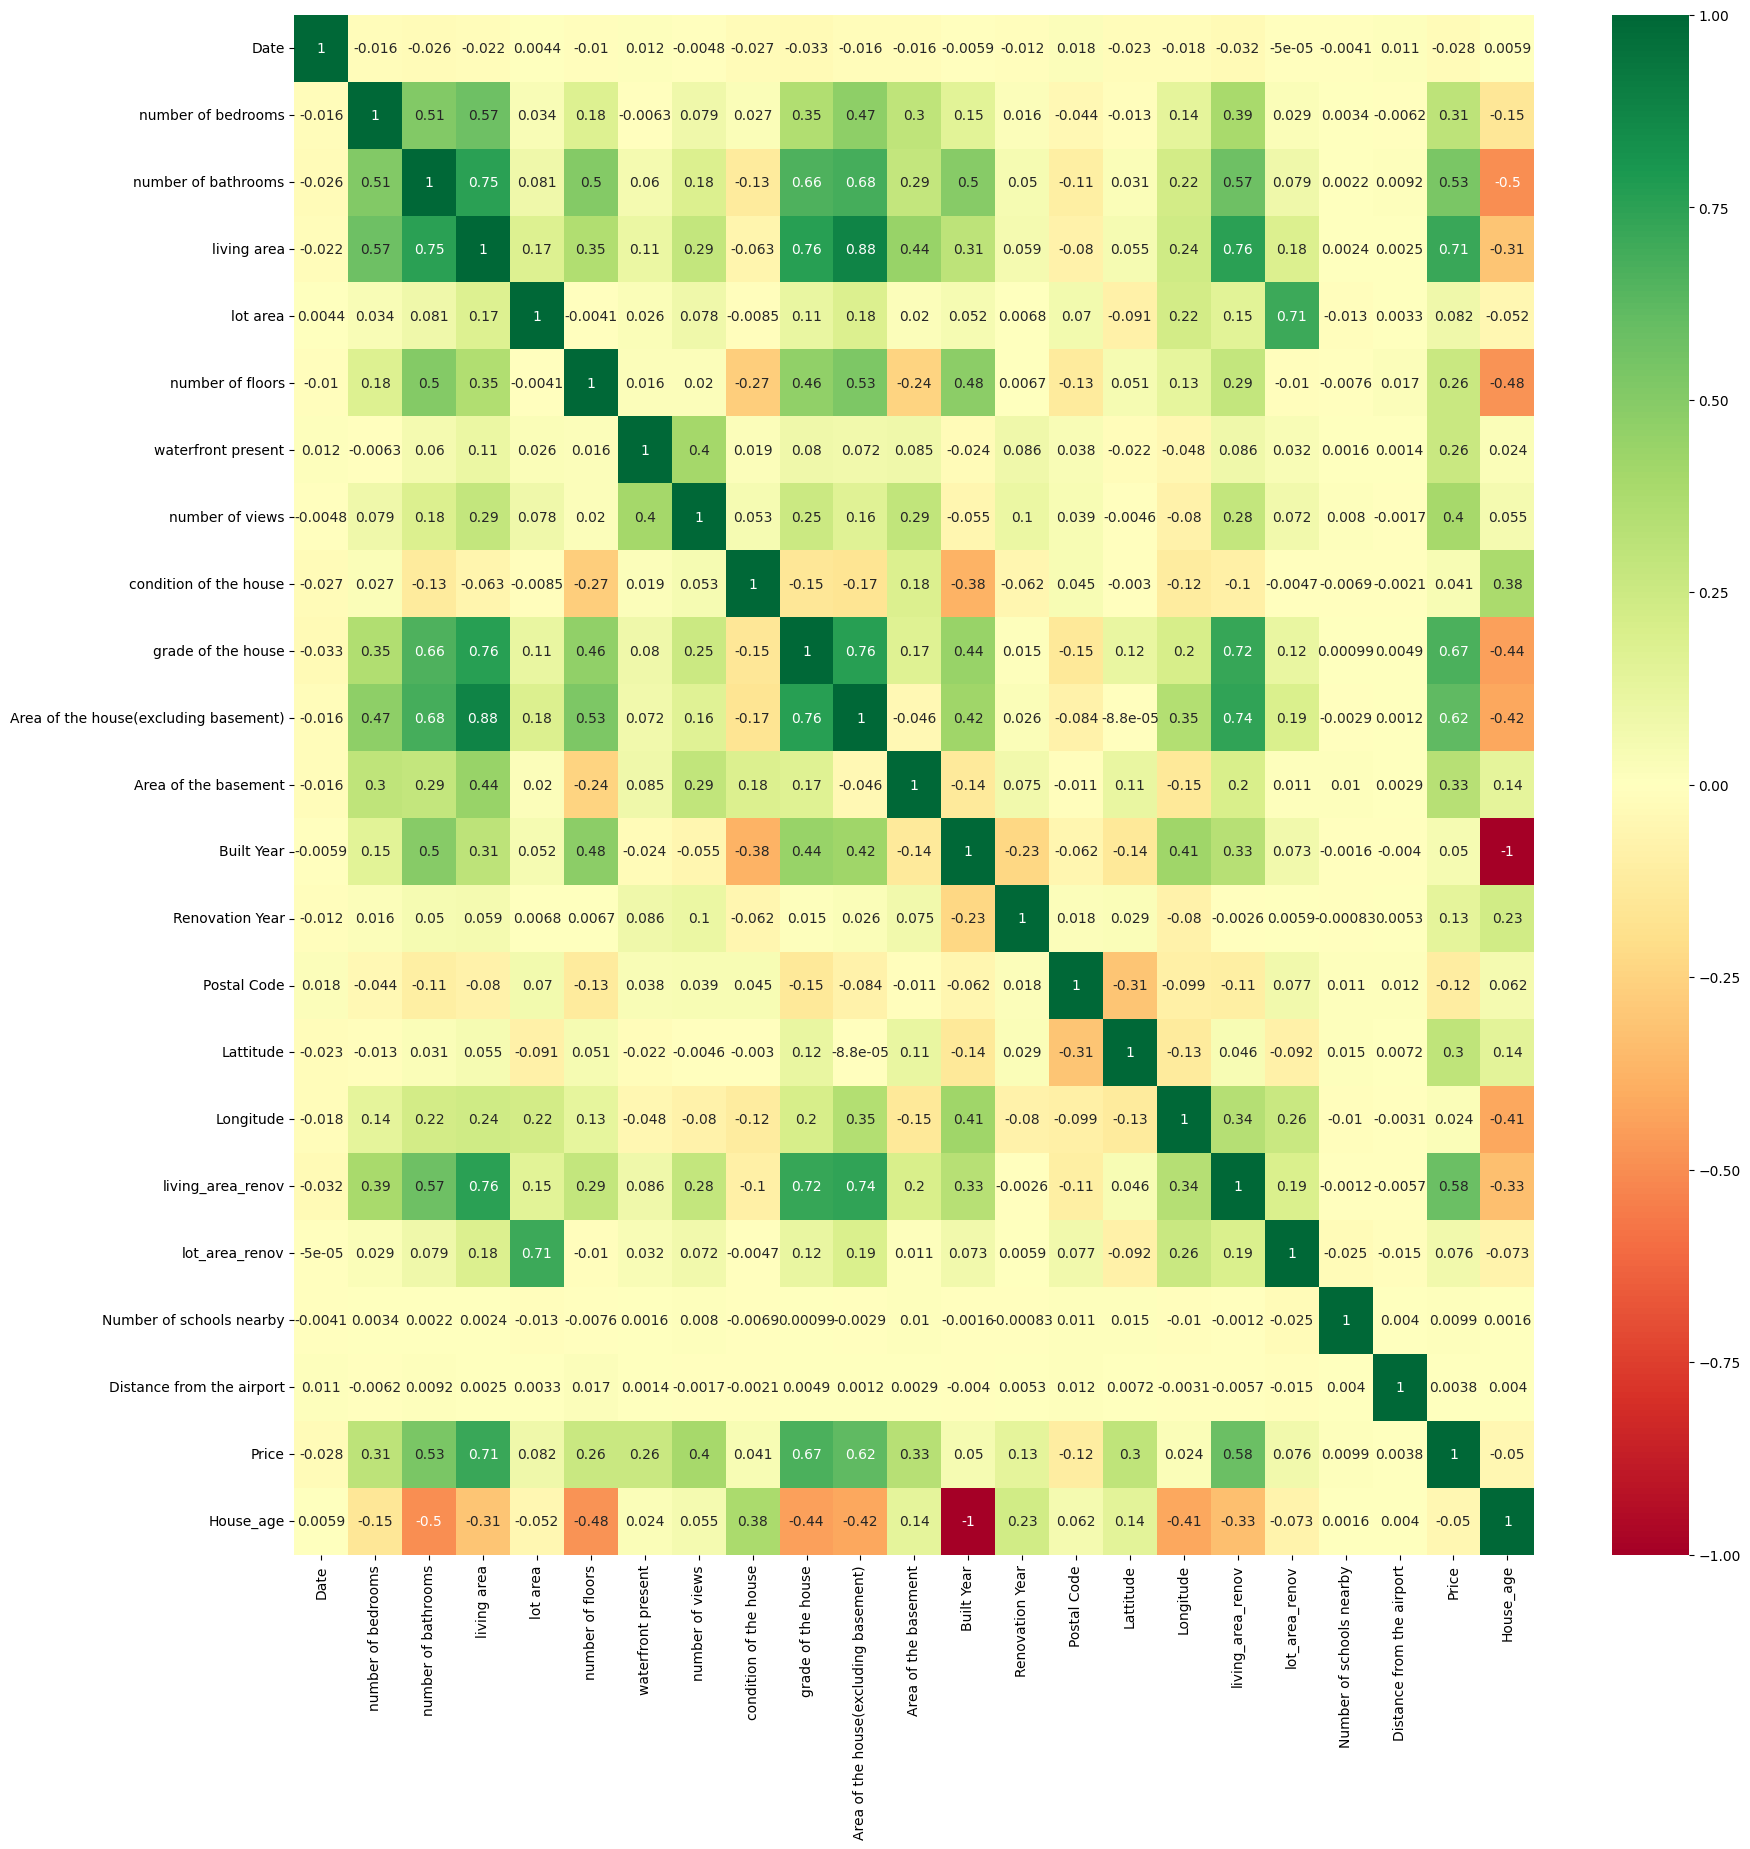

In [31]:
plt.figure(figsize=(20,20))
sns.heatmap(df_copy.corr(),annot=True,cmap = "RdYlGn")
plt.show()

In [39]:
row = df_copy.iloc[0]  # first row
print(row.to_dict())


{'Date': 42491.0, 'number of bedrooms': 5.0, 'number of bathrooms': 2.5, 'living area': 3650.0, 'lot area': 9050.0, 'number of floors': 2.0, 'waterfront present': 0.0, 'number of views': 4.0, 'condition of the house': 5.0, 'grade of the house': 10.0, 'Area of the house(excluding basement)': 3370.0, 'Area of the basement': 280.0, 'Built Year': 1921.0, 'Renovation Year': 0.0, 'Postal Code': 122003.0, 'Lattitude': 52.8645, 'Longitude': -114.557, 'living_area_renov': 2880.0, 'lot_area_renov': 5400.0, 'Number of schools nearby': 2.0, 'Distance from the airport': 58.0, 'Price': 2380000.0, 'House_age': 95.0}


In [43]:
df_copy['Renovation Year'].nunique()  

68

In [44]:
df_copy['Renovation Year'].unique()

array([   0, 1994, 1954, 2011, 1998, 1992, 1958, 2014, 2002, 2004, 2013,
       1986, 2005, 1990, 2001, 1984, 1956, 2000, 2010, 2003, 1996, 1977,
       2007, 1983, 1970, 1981, 1975, 1971, 1988, 1999, 2009, 1995, 1969,
       1997, 2015, 1982, 1989, 2006, 1985, 1993, 1953, 1955, 1979, 1987,
       1960, 1934, 1945, 2008, 2012, 1980, 1972, 1948, 1978, 1991, 1968,
       1974, 1965, 1946, 1940, 1963, 1976, 1964, 1973, 1967, 1944, 1959,
       1957, 1962])

In [46]:
# Filter houses with no renovation
no_renov = df_copy[df_copy['Renovation Year'] == 0]

# Compare original vs renovated areas
check = no_renov[['living area', 'living_area_renov', 
                  'lot area', 'lot_area_renov']]

print(check)

       living area  living_area_renov  lot area  lot_area_renov
0             3650               2880      9050            5400
1             2920               2470      4000            4000
2             2910               2940      9480            6600
3             3310               3350     42998           42847
4             2710               2060      4500            4500
...            ...                ...       ...             ...
14614         1590               1680      7931            7931
14615         1556               2250     20000           17286
14616         1680               1540      7000            7480
14617         1070               1130      6120            6120
14618         1030               1420      6621            6631

[13954 rows x 4 columns]


Problem 13954 rows with no renovations still different values  

In [47]:
df_copy[['living area', 'living_area_renov']].describe()
df_copy[['lot area', 'lot_area_renov']].describe()


,lot area,lot_area_renov
count,1.462000e+04,14620.000000
mean,1.509328e+04,12753.500068
std,3.791962e+04,26058.414467
min,5.200000e+02,651.000000
25%,5.010750e+03,5097.750000
50%,7.620000e+03,7620.000000
75%,1.080000e+04,10125.000000
max,1.074218e+06,560617.000000


In [48]:
print(df_copy[['Price','living area','living_area_renov']].corr())
print(df_copy[['Price','lot area','lot_area_renov']].corr())

                      Price  living area  living_area_renov
Price              1.000000     0.712169           0.584924
living area        0.712169     1.000000           0.757571
living_area_renov  0.584924     0.757571           1.000000
                   Price  lot area  lot_area_renov
Price           1.000000  0.081992        0.075535
lot area        0.081992  1.000000        0.706812
lot_area_renov  0.075535  0.706812        1.000000


droping _renov  

In [58]:
df_new = safe_drop(df_copy,['living_area_renov','lot_area_renov','Built Year','Postal Code','Renovation Year','Date'])
df_new.head()

,number of bedrooms,number of bathrooms,living area,lot area,number of floors,waterfront present,number of views,condition of the house,grade of the house,Area of the house(excluding basement),Area of the basement,Lattitude,Longitude,Number of schools nearby,Distance from the airport,Price,House_age
0,5,2.50,3650,9050,2.0,0,4,5,10,3370,280,52.8645,-114.557,2,58,2380000,95
1,4,2.50,2920,4000,1.5,0,0,5,8,1910,1010,52.8878,-114.470,2,51,1400000,107
2,5,2.75,2910,9480,1.5,0,0,3,8,2910,0,52.8852,-114.468,1,53,1200000,77
3,4,2.50,3310,42998,2.0,0,0,3,9,3310,0,52.9532,-114.321,3,76,838000,15
4,3,2.00,2710,4500,1.5,0,0,4,8,1880,830,52.9047,-114.485,1,51,805000,87


In [59]:
df_new.columns

Index(['number of bedrooms', 'number of bathrooms', 'living area', 'lot area',
       'number of floors', 'waterfront present', 'number of views',
       'condition of the house', 'grade of the house',
       'Area of the house(excluding basement)', 'Area of the basement',
       'Lattitude', 'Longitude', 'Number of schools nearby',
       'Distance from the airport', 'Price', 'House_age'],
      dtype='object')